In [1]:
import psycopg2
import pandas as pd


db = psycopg2.connect(host='localhost', dbname='project1', user='root', password='5432', port=5432)
cursor = db.cursor()


query = "SELECT * FROM project_git.git_lang"  # 가져올 테이블 및 열을 적절하게 수정하세요.
df = pd.read_sql(query, db)

# 연결 종료
db.close()

for i in range(len(df)):
    if type(df['lang'][i][0]) == str:
        text = df['lang'][i].replace('{', '').replace('}', '').replace('[', '').replace(']', '').replace("'", '').replace('"', '')
        df['lang'][i] = text.split(',')

for i in range(len(df)):
    df['lang'][i] = [item for item in df['lang'][i] if '%' in item]
    
df

C:\Users\user\AppData\Local\Temp\ipykernel_3180\3200322511.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, db)


In [2]:
for i in range(len(df)):
    if type(df['lang'][i][0]) == str:
        text = df['lang'][i].replace('{', '').replace('}', '').replace('[', '').replace(']', '').replace("'", '').replace('"', '')
        df['lang'][i] = text.split(',')
df

,create_dt,title,lang
0,2023-10-01,danielgross/localpilot,[Python:100.0%]
1,2023-10-01,laviii123/Btecky,"[HTML:41.7%, Python:30.4%, JavaScript:9.9%, ..."
2,2023-10-01,skynettx/dosraptor,"[C:89.3%, Assembly:8.2%, Pawn:2.0%, Other:0..."
3,2023-10-01,stepci/awesome-api-clients,[]
4,2023-10-01,yangdongchao/UniAudio,"[Python:55.4%, Perl:25.8%, Shell:18.8%]"
...,...,...,...
30888,2023-09-29,mroblesdev/cifrar-descifrar-simetrico-php,[PHP:100.0%]
30889,2023-09-29,avronilrajib/React_Js,"[, JavaScript:71.3%, CSS:24.7%, HTML:4.0%]"
30890,2023-09-29,cvslel/Extensions,"[, Swift:100.0%]"
30891,2023-09-29,rajdave2596/LiroidPlugins-Simple,"[, Shell:71.5%, Batchfile:26.8%, Kotlin:1.7%]"


In [3]:
for i in range(len(df)):
    df['lang'][i] = [item for item in df['lang'][i] if '%' in item]
    
df

AttributeError: module 'matplotlib' has no attribute 'xlabel'

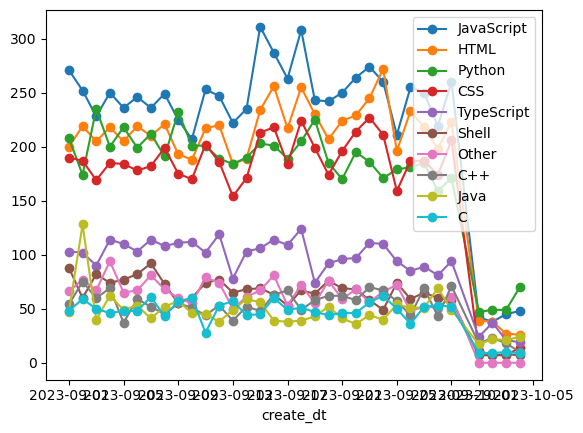

In [5]:
import matplotlib as plt

def calculate_language_stats(group):
    lang_stats = {}
    for languages in group['lang']:
        for lang in languages:
            lang = lang.split(':')[0]  # 기장 %가 높은 언어 추출
            if lang in lang_stats:
                lang_stats[lang] += 1
            else:
                lang_stats[lang] = 1
    return lang_stats

# 날짜로 그룹화하고 언어 사용 통계 계산
result = df.groupby('create_dt').apply(calculate_language_stats)

# 언어 카운트가 없는 경우 0으로 설정하고, 특정 언어에 대한 카운트만 추출하여 데이터프레임 생성
result_df = pd.DataFrame(result.tolist(), index=result.index).fillna(0)

# 언어 사용량 상위 10개 언어 선택
top_10_languages = result_df.sum().sort_values(ascending=False).head(10)

# 상위 10개 언어만을 포함한 데이터프레임 생성
result_df_top_10 = result_df[top_10_languages.index]

# 결과를 꺾은선 그래프로 시각화
result_df_top_10.plot(kind='line', marker='o')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Top 10 Languages Usage by Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(loc='best')  # 범례를 최적의 위치에 표시
plt.show()

[('JavaScript', 7427), ('HTML', 6455), ('Python', 5854), ('CSS', 5544), ('TypeScript', 3046), ('Shell', 2008), ('Other', 1901), ('C++', 1702), ('Java', 1552), ('C', 1488)]


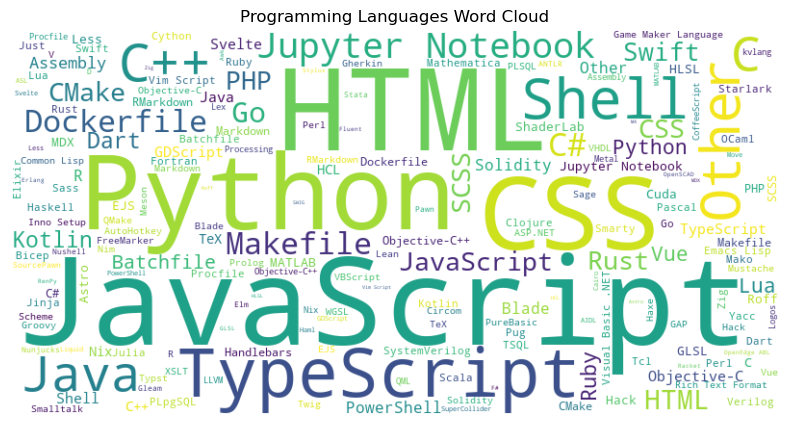

In [11]:
k = []

for i in range(len(df)):
    for j in df['lang'][i]:
        k.append(j.split(':')[0])

from collections import Counter

# 언어 이름의 빈도를 계산합니다.
language_counts = Counter(k)

top_languages = language_counts.most_common(10)

print(top_languages)


import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(language_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Programming Languages Word Cloud')
plt.show()

[('Python', 5854), ('Shell', 2008), ('Other', 1901), ('C++', 1702), ('Java', 1552), ('C', 1488), ('Jupyter Notebook', 1355), ('C#', 1086), ('Dockerfile', 991), ('Makefile', 965)]


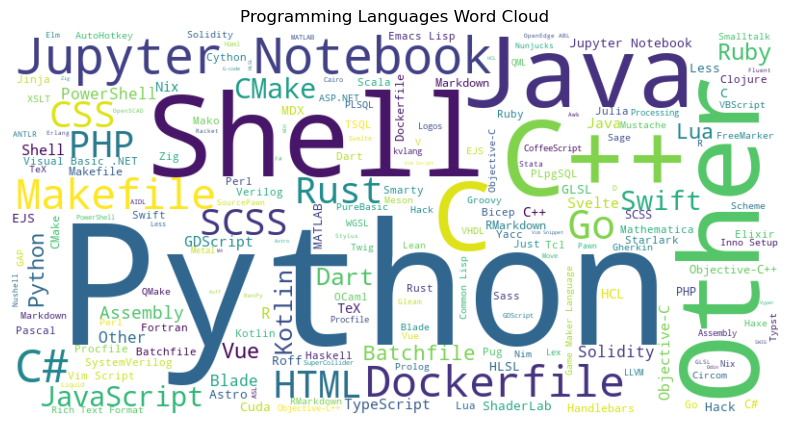

In [8]:
from collections import Counter

language_counts = Counter(k)

# 'JavaScript', 'HTML', 'CSS', 'TypeScript'를 필터링합니다.
exclude_languages = ['JavaScript', 'HTML', 'CSS', 'TypeScript']
for lang in exclude_languages:
    del language_counts[lang]
    
top_languages = language_counts.most_common(10)

print(top_languages)    
    
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(language_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Programming Languages Word Cloud')
plt.show()

[('Shell', 378), ('HTML', 233), ('Dockerfile', 140), ('Jupyter Notebook', 120), ('JavaScript', 91), ('Makefile', 84), ('Other', 79), ('Batchfile', 73), ('C++', 50), ('CSS', 45)]


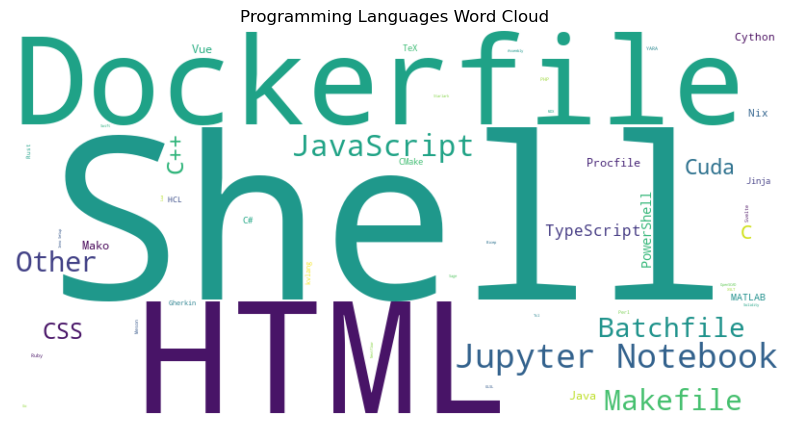

In [13]:
k = []

for i in range(len(df)):
    try:
        first_lang = df['lang'][i][0].split(':')[0].strip()
        if first_lang == 'Python':
            if len(df['lang'][i]) > 1:
                second_lang = df['lang'][i][1].split(':')[0].strip()
                k.append(second_lang)
    except:
        pass
    
second_lang_counts = Counter(k)

top_languages = second_lang_counts.most_common(10)

print(top_languages)


import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(second_lang_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Programming Languages Word Cloud')
plt.show()

[('Shell', 378), ('HTML', 233), ('Dockerfile', 140), ('Jupyter Notebook', 120), ('JavaScript', 91), ('Makefile', 84), ('Other', 79), ('Batchfile', 73), ('C++', 50), ('CSS', 45)]


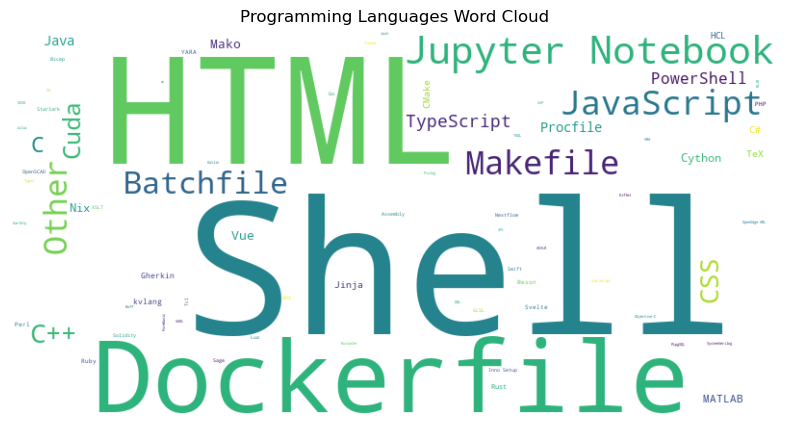

In [10]:
second_lang_counts = Counter(k)

top_languages = second_lang_counts.most_common(10)

print(top_languages)


import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(second_lang_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Programming Languages Word Cloud')
plt.show()